In [68]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import cmcrameri.cm as cmcm
from scipy.io import readsav
from matplotlib import ticker
import juanfit
from juanfit import SpectrumFitSingle
from eistrick import eis_slit_width_offset
from glob import glob

In [2]:
eis_sav = readsav("../sav/eis_merge/lvl1_offset_ech_eis_l1_20070331_113427.sav",verbose=True)

--------------------------------------------------
Date: Tue Apr  5 15:17:35 2022
User: yjzhu
Host: 0587447917.wireless.umich.net
--------------------------------------------------
Format: 11
Architecture: x86_64
Operating System: darwin
IDL Version: 8.2
--------------------------------------------------
Successfully read 15 records of which:
 - 1 are of type TIMESTAMP
 - 1 are of type VERSION
 - 12 are of type VARIABLE
--------------------------------------------------
Available variables:
 - wvl [<class 'numpy.ndarray'>]
 - new_data_offset [<class 'numpy.ndarray'>]
 - new_err_offset [<class 'numpy.ndarray'>]
 - window_start_index [<class 'numpy.ndarray'>]
 - window_end_index [<class 'numpy.ndarray'>]
 - xcen [<class 'numpy.float32'>]
 - ycen [<class 'numpy.float32'>]
 - fovx [<class 'numpy.float32'>]
 - fovy [<class 'numpy.float32'>]
 - xpos [<class 'numpy.ndarray'>]
 - ypos [<class 'numpy.ndarray'>]
 - y_jitter [<class 'numpy.ndarray'>]
----------------------------------------------

In [6]:
eis_sav["xpos"]

array([502.70844, 501.36188, 500.1057 , 498.8814 , 497.46835, 496.347  ,
       495.05396], dtype=float32)

In [12]:
eis_data = eis_sav["new_data_offset"]
eis_err = eis_sav["new_err_offset"]
eis_wvl = eis_sav["wvl"]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:620: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


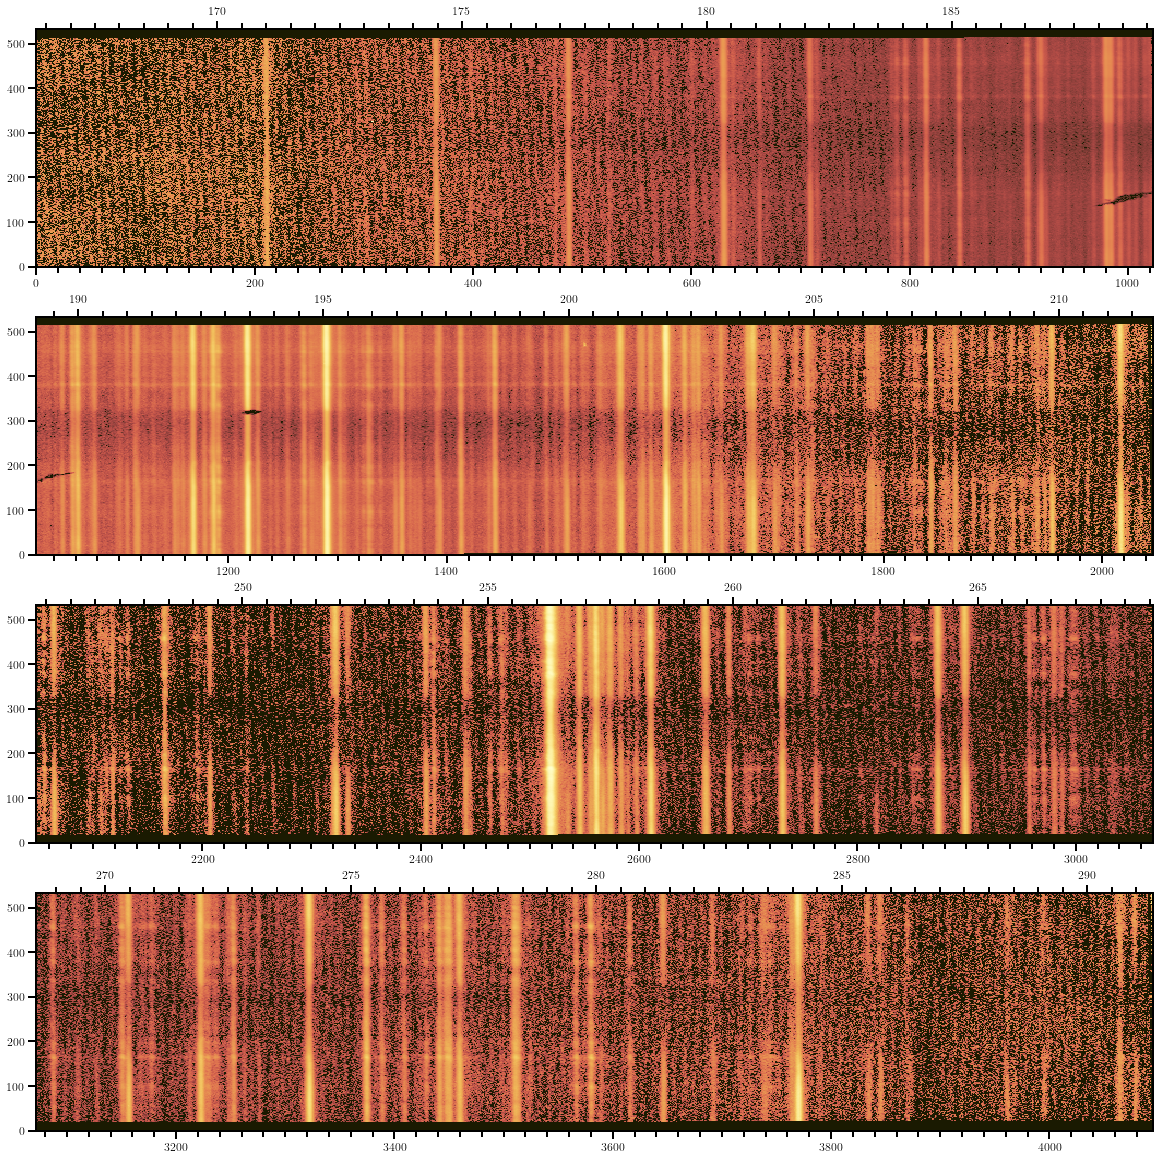

In [27]:
fig, axes = plt.subplots(4,1,figsize=(16,16),constrained_layout=True)

for ii, ax_ in enumerate(axes):
    ax_.pcolormesh(np.arange(ii*1024,(ii+1)*1024),np.arange(534),np.nan_to_num(np.log10(eis_data[0,:,ii*1024:(ii+1)*1024]),nan=-1e30),cmap=cmcm.lajolla_r,vmin=-1)

    ax_wvl = axes[ii].twiny()
    ax_wvl.set_xlim(eis_wvl[ii*1024],eis_wvl[(ii+1)*1024-1])
    axes[ii].xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
    ax_wvl.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))

    for ax_ in (axes[ii], ax_wvl):
        ax_.tick_params(labelsize=12)
        ax_.tick_params(which="major",width=2,length=8)
        ax_.tick_params(which="minor",width=2,length=6)

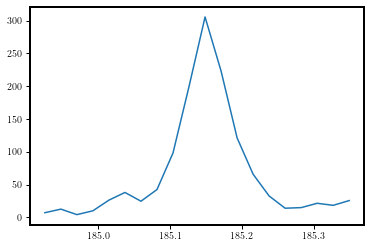

In [56]:
FeVIII_185_slice = (835,855)
plt.plot(eis_wvl[FeVIII_185_slice[0]:FeVIII_185_slice[1]],eis_data[0,100,FeVIII_185_slice[0]:FeVIII_185_slice[1]])

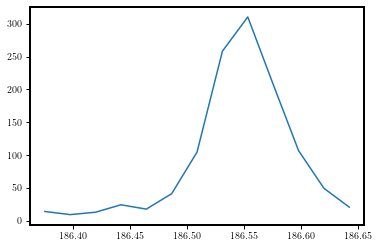

In [74]:
FeVIII_186_slice = (900,913)
plt.plot(eis_wvl[FeVIII_186_slice[0]:FeVIII_186_slice[1]],eis_data[0,2,FeVIII_186_slice[0]:FeVIII_186_slice[1]])

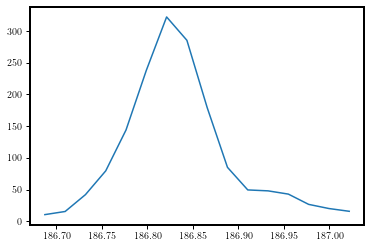

In [76]:
FeXII_186_slice = (914,930)
plt.plot(eis_wvl[FeXII_186_slice[0]:FeXII_186_slice[1]],eis_data[0,2,FeXII_186_slice[0]:FeXII_186_slice[1]])

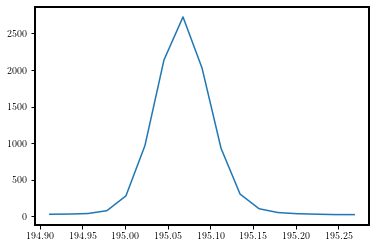

In [79]:
FeXII_195_slice = (1283,1300)
plt.plot(eis_wvl[FeXII_195_slice[0]:FeXII_195_slice[1]],eis_data[0,2,FeXII_195_slice[0]:FeXII_195_slice[1]])

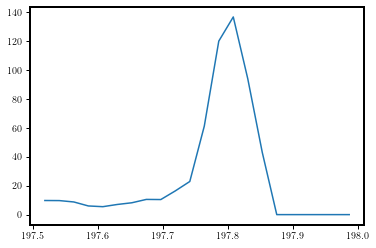

In [163]:
FeIX_197_slice = (1400,1422)
plt.plot(eis_wvl[FeIX_197_slice[0]:FeIX_197_slice[1]],eis_data[0,2,FeIX_197_slice[0]:FeIX_197_slice[1]])

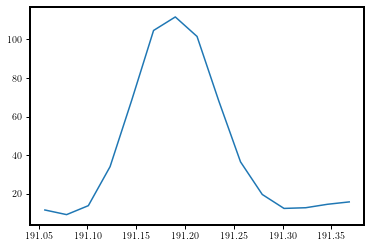

In [134]:
FeIX_191_slice = (1110,1125)
plt.plot(eis_wvl[FeIX_191_slice[0]:FeIX_191_slice[1]],eis_data[0,3,FeIX_191_slice[0]:FeIX_191_slice[1]])



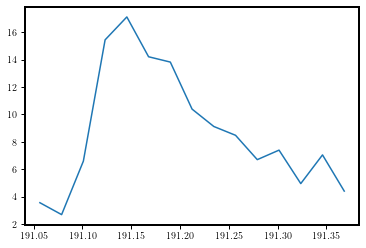

In [136]:
FeIX_191_slice = (1110,1125)
plt.plot(eis_wvl[FeIX_191_slice[0]:FeIX_191_slice[1]],eis_data[0,270,FeIX_191_slice[0]:FeIX_191_slice[1]])



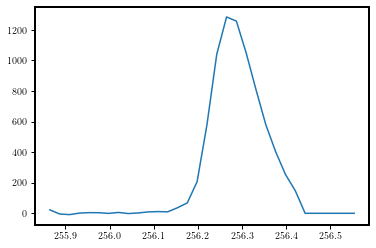

In [167]:
HeII_256_slice = (2500,2532)
plt.plot(eis_wvl[HeII_256_slice[0]:HeII_256_slice[1]],eis_data[0,18,HeII_256_slice[0]:HeII_256_slice[1]])

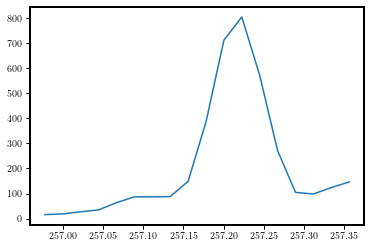

In [151]:
FeX_257_slice = (2550,2568)
plt.plot(eis_wvl[FeX_257_slice[0]:FeX_257_slice[1]],eis_data[0,19,FeX_257_slice[0]:FeX_257_slice[1]])


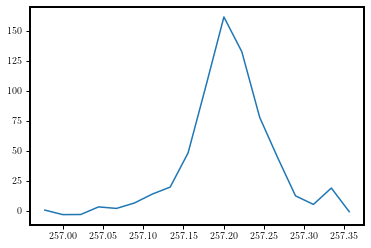

In [127]:
FeX_257_slice = (2550,2568)
plt.plot(eis_wvl[FeX_257_slice[0]:FeX_257_slice[1]],eis_data[0,270,FeX_257_slice[0]:FeX_257_slice[1]])


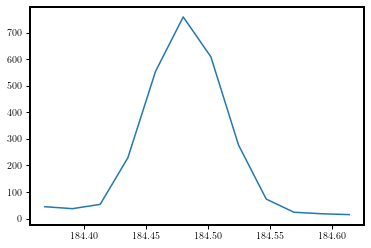

In [147]:
FeX_184_slice = (810,822)
plt.plot(eis_wvl[FeX_184_slice[0]:FeX_184_slice[1]],eis_data[0,1,FeX_184_slice[0]:FeX_184_slice[1]])

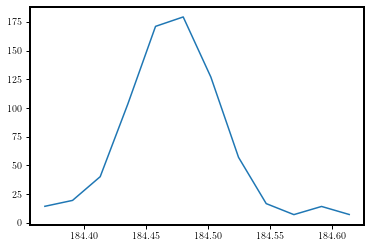

In [128]:
FeX_184_slice = (810,822)
plt.plot(eis_wvl[FeX_184_slice[0]:FeX_184_slice[1]],eis_data[0,270,FeX_184_slice[0]:FeX_184_slice[1]])

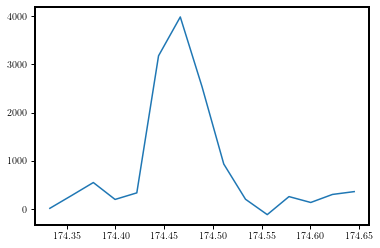

In [144]:
FeX_174_slice = (360,375)
plt.plot(eis_wvl[FeX_174_slice[0]:FeX_174_slice[1]],eis_data[0,5,FeX_174_slice[0]:FeX_174_slice[1]])

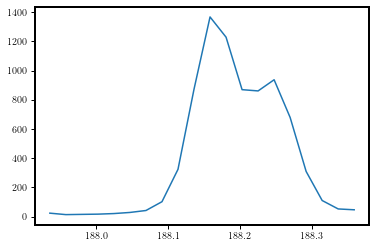

In [90]:
FeXI_188_slice = (970,990)
plt.plot(eis_wvl[FeXI_188_slice[0]:FeXI_188_slice[1]],eis_data[0,3,FeXI_188_slice[0]:FeXI_188_slice[1]])

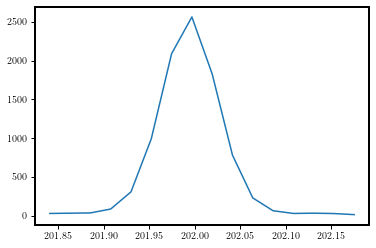

In [173]:
FeXIII_202_slice = (1594,1610)
plt.plot(eis_wvl[FeXIII_202_slice[0]:FeXIII_202_slice[1]],eis_data[0,3,FeXIII_202_slice[0]:FeXIII_202_slice[1]])

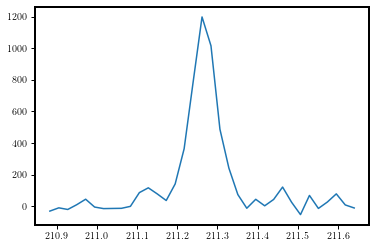

In [97]:
FeXIV_211_slice = (2000,2035)
plt.plot(eis_wvl[FeXIV_211_slice[0]:FeXIV_211_slice[1]],eis_data[0,20,FeXIV_211_slice[0]:FeXIV_211_slice[1]])

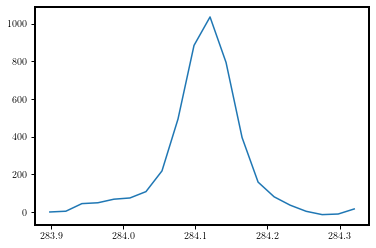

In [176]:
FeXV_284_slice = (3760,3780)
plt.plot(eis_wvl[FeXV_284_slice[0]:FeXV_284_slice[1]],eis_data[0,21,FeXV_284_slice[0]:FeXV_284_slice[1]])

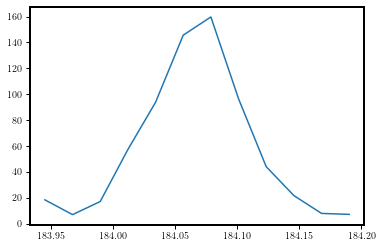

In [171]:
OVI_184_slice = (791,803)
plt.plot(eis_wvl[OVI_184_slice[0]:OVI_184_slice[1]],eis_data[0,1,OVI_184_slice[0]:OVI_184_slice[1]])


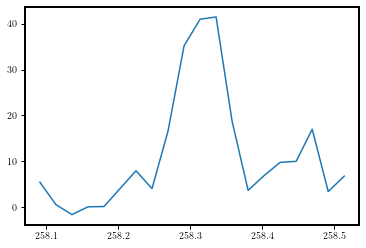

In [118]:
SiX_258_slice = (2600,2620)
plt.plot(eis_wvl[SiX_258_slice[0]:SiX_258_slice[1]],eis_data[0,270,SiX_258_slice[0]:SiX_258_slice[1]])

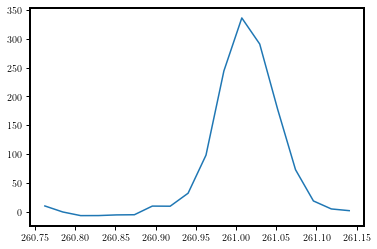

In [122]:
SiX_261_slice = (2720,2738)
plt.plot(eis_wvl[SiX_261_slice[0]:SiX_261_slice[1]],eis_data[0,25,SiX_261_slice[0]:SiX_261_slice[1]])


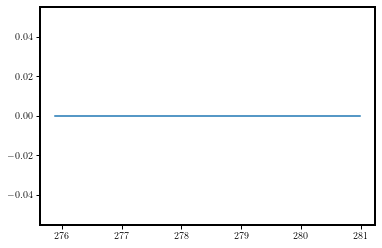

In [160]:
MgVII_280_slice = (3400,3630)
plt.plot(eis_wvl[MgVII_280_slice[0]:MgVII_280_slice[1]],eis_data[0,2,MgVII_280_slice[0]:MgVII_280_slice[1]])


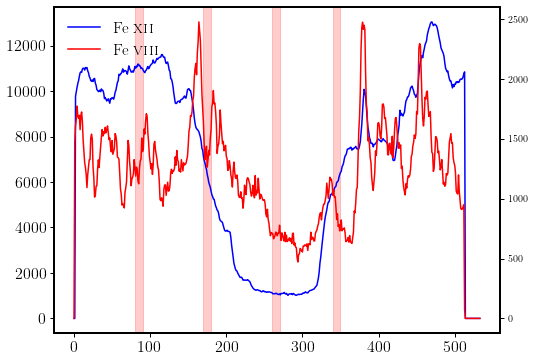

In [67]:
FeXII_195_slice = (1283,1300)
fig, ax = plt.subplots(figsize=(8,6))
ln1, = ax.plot(np.arange(534),np.sum(eis_data[0,:,FeXII_195_slice[0]:FeXII_195_slice[1]],axis=1),color="blue",label=r"Fe \textsc{xii}")
ax2 = ax.twinx()
ln2, = ax2.plot(np.arange(534),np.sum(eis_data[0,:,FeVIII_185_slice[0]:FeVIII_185_slice[1]],axis=1),color="red",label=r"Fe \textsc{viii}")
ax.tick_params(labelsize=16)
qs_yrange = (80,90)
chb1_yrange = (170,180)
chc_yrange = (260,270)
chb2_yrange = (340,350)
ax.axvspan(qs_yrange[0],qs_yrange[1],color="red",alpha=0.2)
ax.axvspan(chb1_yrange[0],chb1_yrange[1],color="red",alpha=0.2)
ax.axvspan(chc_yrange[0],chc_yrange[1],color="red",alpha=0.2)
ax.axvspan(chb2_yrange[0],chb2_yrange[1],color="red",alpha=0.2)
leg = [ln1,ln2]
ax.legend(leg,[leg_.get_label() for leg_ in leg],fontsize=16,loc="upper left",frameon=False)

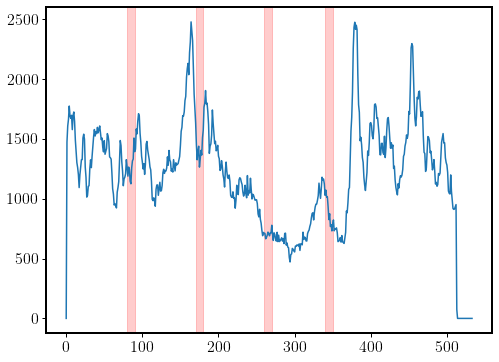

In [59]:
FeVIII_185_slice = (835,855)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.arange(534),np.sum(eis_data[0,:,FeVIII_185_slice[0]:FeVIII_185_slice[1]],axis=1))
ax.tick_params(labelsize=16)
ax.axvspan(qs_yrange[0],qs_yrange[1],color="red",alpha=0.2)
ax.axvspan(chb1_yrange[0],chb1_yrange[1],color="red",alpha=0.2)
ax.axvspan(chc_yrange[0],chc_yrange[1],color="red",alpha=0.2)
ax.axvspan(chb2_yrange[0],chb2_yrange[1],color="red",alpha=0.2)

In [ ]:
FeXII_195_slice = (1283,1300)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(np.arange(534),np.sum(eis_data[0,:,FeXII_195_slice[0]:FeXII_195_slice[1]],axis=1))
ax.tick_params(labelsize=16)
qs_yrange = (80,90)
chb1_yrange = (170,180)
chc_yrange = (260,270)
chb2_yrange = (340,350)
ax.axvspan(qs_yrange[0],qs_yrange[1],color="red",alpha=0.2)
ax.axvspan(chb1_yrange[0],chb1_yrange[1],color="red",alpha=0.2)
ax.axvspan(chc_yrange[0],chc_yrange[1],color="red",alpha=0.2)
ax.axvspan(chb2_yrange[0],chb2_yrange[1],color="red",alpha=0.2)

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.02976676]


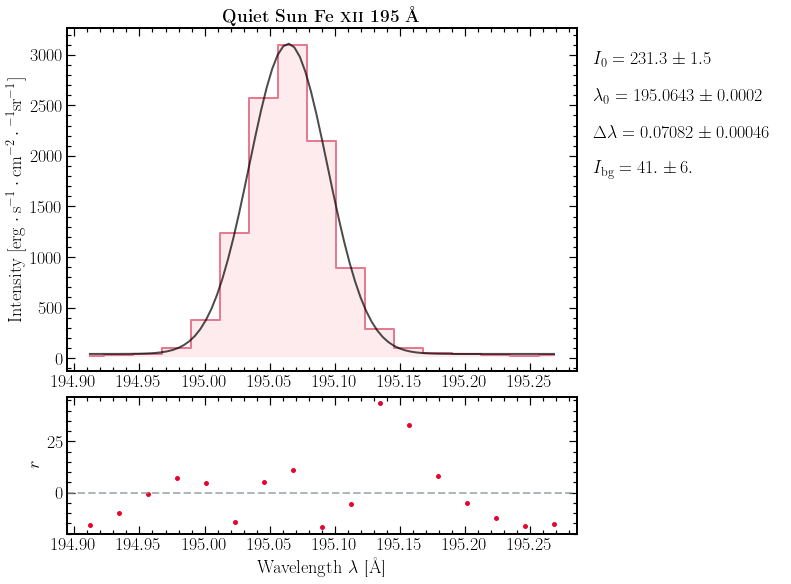

In [49]:
FeXII_195_fit_qs = SpectrumFitSingle(data=np.mean(eis_data[0,qs_yrange[0]:qs_yrange[1],
FeXII_195_slice[0]:FeXII_195_slice[1]],axis=0),wvl=eis_wvl[FeXII_195_slice[0]:FeXII_195_slice[1]],err=None,
                                      same_width=True,line_number=1,
                                      line_wvl_init=[195.07],
                                      int_max_init=[350],
                                      fwhm_init=[0.08])

#FeXII_195_fit_qs.plot(plot_fit=False,plot_params=False)
FeXII_195_fit_qs.run_lse()
FeXII_195_fit_qs.plot(plot_title=r"\textbf{Quiet Sun Fe \textsc{xii} 195 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_195_fit_qs.fwhm_fit**2 - \
eis_slit_width_offset(np.mean(qs_yrange)+256,2,FeXII_195_fit_qs.line_wvl_fit,eis_wvl[0])**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.03123981]


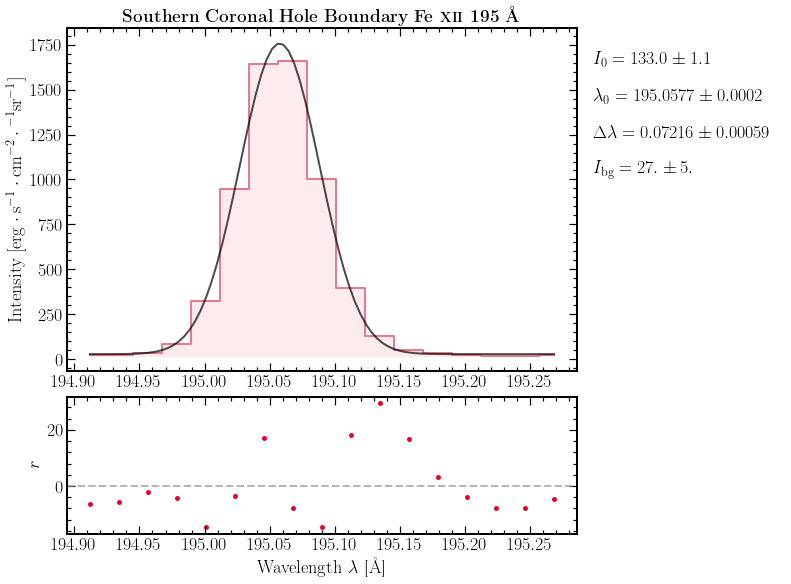

In [52]:
FeXII_195_fit_chb1 = SpectrumFitSingle(data=np.mean(eis_data[0,chb1_yrange[0]:chb1_yrange[1],
FeXII_195_slice[0]:FeXII_195_slice[1]],axis=0),wvl=eis_wvl[FeXII_195_slice[0]:FeXII_195_slice[1]],err=None,
                                      same_width=True,line_number=1,
                                      line_wvl_init=[195.07],
                                      int_max_init=[350],
                                      fwhm_init=[0.08])

#FeXII_195_fit_chb1.plot(plot_fit=False,plot_params=False)
FeXII_195_fit_chb1.run_lse()
FeXII_195_fit_chb1.plot(plot_title=r"\textbf{Southern Coronal Hole Boundary Fe \textsc{xii} 195 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_195_fit_chb1.fwhm_fit**2 - \
eis_slit_width_offset(np.mean(chb1_yrange)+256,2,FeXII_195_fit_chb1.line_wvl_fit,eis_wvl[0])**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.02819238]


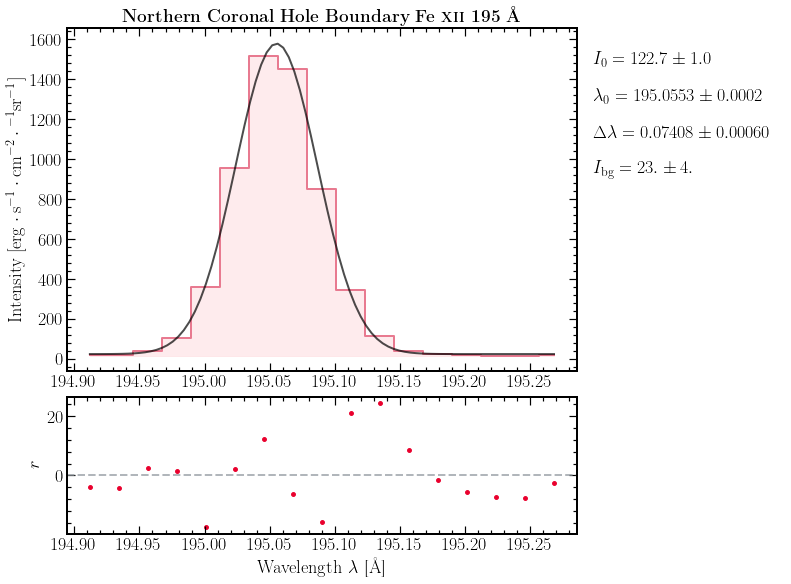

In [53]:
FeXII_195_fit_chb2 = SpectrumFitSingle(data=np.mean(eis_data[0,chb2_yrange[0]:chb2_yrange[1],
FeXII_195_slice[0]:FeXII_195_slice[1]],axis=0),wvl=eis_wvl[FeXII_195_slice[0]:FeXII_195_slice[1]],err=None,
                                      same_width=True,line_number=1,
                                      line_wvl_init=[195.07],
                                      int_max_init=[350],
                                      fwhm_init=[0.08])

#FeXII_195_fit_chb2.plot(plot_fit=False,plot_params=False)
FeXII_195_fit_chb2.run_lse()
FeXII_195_fit_chb2.plot(plot_title=r"\textbf{Northern Coronal Hole Boundary Fe \textsc{xii} 195 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_195_fit_chb2.fwhm_fit**2 - \
eis_slit_width_offset(np.mean(chb2_yrange)+256,2,FeXII_195_fit_chb2.line_wvl_fit,eis_wvl[0])**2))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


FWHM after removing instrumental broadening:  [0.03427989]


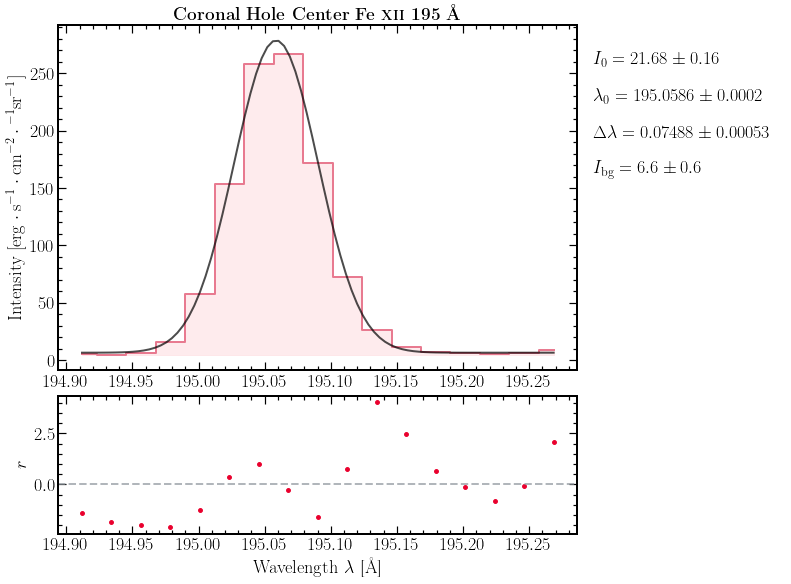

In [54]:
FeXII_195_fit_chc = SpectrumFitSingle(data=np.mean(eis_data[0,chc_yrange[0]:chc_yrange[1],
FeXII_195_slice[0]:FeXII_195_slice[1]],axis=0),wvl=eis_wvl[FeXII_195_slice[0]:FeXII_195_slice[1]],err=None,
                                      same_width=True,line_number=1,
                                      line_wvl_init=[195.07],
                                      int_max_init=[350],
                                      fwhm_init=[0.08])

#FeXII_195_fit_chc.plot(plot_fit=False,plot_params=False)
FeXII_195_fit_chc.run_lse()
FeXII_195_fit_chc.plot(plot_title=r"\textbf{Coronal Hole Center Fe \textsc{xii} 195 \mbox{\AA}}",plot_hmc=False,
                        xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                        ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",np.sqrt(FeXII_195_fit_chc.fwhm_fit**2 - \
eis_slit_width_offset(np.mean(chc_yrange)+256,2,FeXII_195_fit_chc.line_wvl_fit,eis_wvl[0])**2))

<AxesSubplot:ylabel='Intensity'>

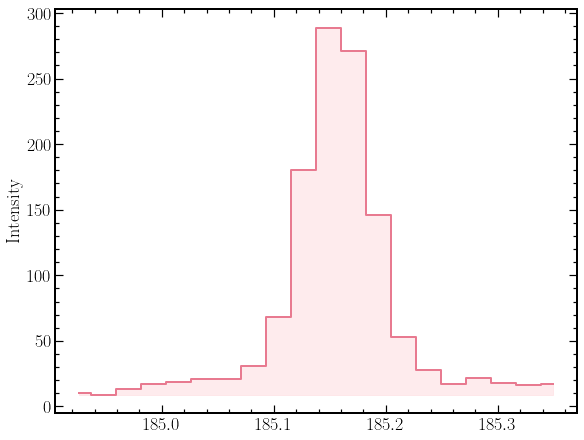

In [58]:
FeVIII_185_fit_qs = SpectrumFitSingle(data=np.mean(eis_data[0,qs_yrange[0]:qs_yrange[1],
FeVIII_185_slice[0]:FeVIII_185_slice[1]],axis=0),wvl=eis_wvl[FeVIII_185_slice[0]:FeVIII_185_slice[1]],err=None,
                                      same_width=True,line_number=1,
                                      line_wvl_init=[185.13],
                                      int_max_init=[350],
                                      fwhm_init=[0.08])

FeVIII_185_fit_qs.plot(plot_fit=False,plot_params=False)
# FeVIII_185_fit_qs.run_lse()
# FeVIII_185_fit_qs.plot(plot_title=r"\textbf{Quiet Sun Fe \textsc{xii} 195 \mbox{\AA}}",plot_hmc=False,
#                         xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
#                         ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
# print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_185_fit_qs.fwhm_fit**2 - \
# eis_slit_width_offset(np.mean(qs_yrange)+256,2,FeVIII_185_fit_qs.line_wvl_fit,eis_wvl[0])**2))

<AxesSubplot:ylabel='Intensity'>

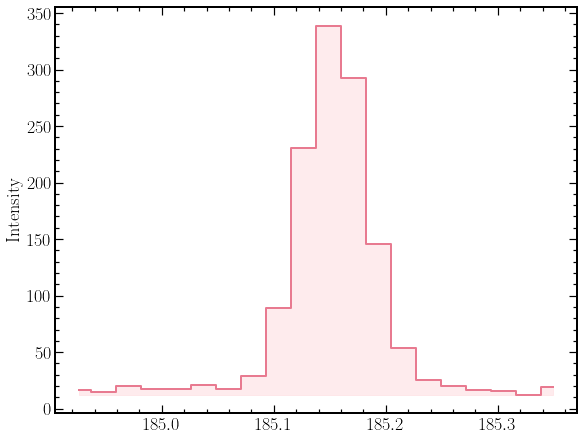

In [60]:
FeVIII_185_fit_chb1 = SpectrumFitSingle(data=np.mean(eis_data[0,chb1_yrange[0]:chb1_yrange[1],
FeVIII_185_slice[0]:FeVIII_185_slice[1]],axis=0),wvl=eis_wvl[FeVIII_185_slice[0]:FeVIII_185_slice[1]],err=None,
                                      same_width=True,line_number=1,
                                      line_wvl_init=[185.13],
                                      int_max_init=[350],
                                      fwhm_init=[0.08])

FeVIII_185_fit_chb1.plot(plot_fit=False,plot_params=False)
# FeVIII_185_fit_chb1.run_lse()
# FeVIII_185_fit_chb1.plot(plot_title=r"\textbf{Quiet Sun Fe \textsc{xii} 195 \mbox{\AA}}",plot_hmc=False,
#                         xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
#                         ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
# print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_185_fit_chb1.fwhm_fit**2 - \
# eis_slit_width_offset(np.mean(chb1_yrange)+256,2,FeVIII_185_fit_chb1.line_wvl_fit,eis_wvl[0])**2))

<AxesSubplot:ylabel='Intensity'>

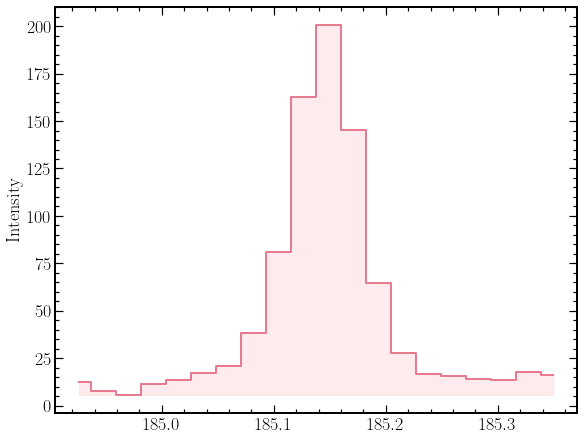

In [61]:
FeVIII_185_fit_chb2 = SpectrumFitSingle(data=np.mean(eis_data[0,chb2_yrange[0]:chb2_yrange[1],
FeVIII_185_slice[0]:FeVIII_185_slice[1]],axis=0),wvl=eis_wvl[FeVIII_185_slice[0]:FeVIII_185_slice[1]],err=None,
                                      same_width=True,line_number=1,
                                      line_wvl_init=[185.13],
                                      int_max_init=[350],
                                      fwhm_init=[0.08])

FeVIII_185_fit_chb2.plot(plot_fit=False,plot_params=False)
# FeVIII_185_fit_chb2.run_lse()
# FeVIII_185_fit_chb2.plot(plot_title=r"\textbf{Quiet Sun Fe \textsc{xii} 195 \mbox{\AA}}",plot_hmc=False,
#                         xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
#                         ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
# print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_185_fit_chb2.fwhm_fit**2 - \
# eis_slit_width_offset(np.mean(chb2_yrange)+256,2,FeVIII_185_fit_chb2.line_wvl_fit,eis_wvl[0])**2))

<AxesSubplot:ylabel='Intensity'>

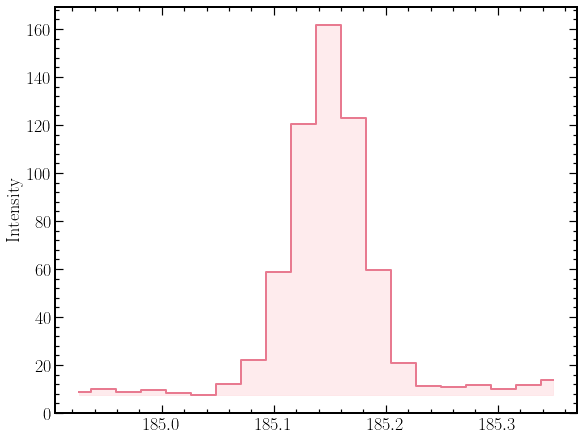

In [62]:
FeVIII_185_fit_chc = SpectrumFitSingle(data=np.mean(eis_data[0,chc_yrange[0]:chc_yrange[1],
FeVIII_185_slice[0]:FeVIII_185_slice[1]],axis=0),wvl=eis_wvl[FeVIII_185_slice[0]:FeVIII_185_slice[1]],err=None,
                                      same_width=True,line_number=1,
                                      line_wvl_init=[185.13],
                                      int_max_init=[350],
                                      fwhm_init=[0.08])

FeVIII_185_fit_chc.plot(plot_fit=False,plot_params=False)
# FeVIII_185_fit_chc.run_lse()
# FeVIII_185_fit_chc.plot(plot_title=r"\textbf{Quiet Sun Fe \textsc{xii} 195 \mbox{\AA}}",plot_hmc=False,
#                         xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
#                         ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")
# print("FWHM after removing instrumental broadening: ",np.sqrt(FeVIII_185_fit_chc.fwhm_fit**2 - \
# eis_slit_width_offset(np.mean(chc_yrange)+256,2,FeVIII_185_fit_chc.line_wvl_fit,eis_wvl[0])**2))